Encode Categorical Features

In [4]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
# Sample categorical data
colors = ['red', 'blue', 'green', 'red', 'blue']
sizes = ['small', 'medium', 'large', 'medium', 'small']
print("Original colors:", colors)
# Label Encoding - for ordinal data (natural order)
label_encoder = LabelEncoder()
colors_encoded = label_encoder.fit_transform(colors)
print("Label encoded colors:", colors_encoded)
print("Classes learned:", label_encoder.classes_)
# One-Hot Encoding - for nominal data (no natural order)
onehot_encoder = OneHotEncoder(sparse_output=False)
colors_onehot = onehot_encoder.fit_transform(np.array(colors).reshape(-1, 1))
print("One-hot encoded colors shape:", colors_onehot.shape)
print("One-hot encoded:\n", colors_onehot)
# ColumnTransformer - handles different column types automatically
numeric_features = [0, 1] # indices of numeric columns
categorical_features = [2, 3] # indices of categorical columns
preprocessor = ColumnTransformer(
transformers=[
('num', 'passthrough', numeric_features), # keep numeric columns as-is
('cat', OneHotEncoder(), categorical_features) # encode categorical
])

Original colors: ['red', 'blue', 'green', 'red', 'blue']
Label encoded colors: [2 0 1 2 0]
Classes learned: ['blue' 'green' 'red']
One-hot encoded colors shape: (5, 3)
One-hot encoded:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# Sample data with different scales
data = np.array([[100, 0.1], [150, 0.5], [200, 1.0]])
# StandardScaler (mean=0, std=1)
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data)
print(data_standardized)
# MinMaxScaler (range [0, 1])
minmax_scaler = MinMaxScaler()
data_normalized = minmax_scaler.fit_transform(data)
print(data_normalized)


[[-1.22474487 -1.1769647 ]
 [ 0.         -0.09053575]
 [ 1.22474487  1.26750044]]
[[0.         0.        ]
 [0.5        0.44444444]
 [1.         1.        ]]


Exercise 1 - Predicting Wine Quality using MLP

Part 1: Data Preparation

1.1 Load and Explore the Dataset

In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Convert to pandas DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display dataset information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset shape: (178, 14)

First 5 rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


1. How many samples and features?

In [15]:
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1] - 1)


Number of samples: 178
Number of features: 13


2. Wine classes & distribution

In [16]:
print("Class distribution:")
print(df['target'].value_counts())


Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


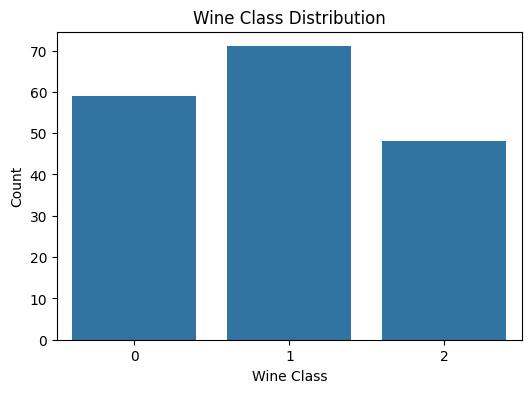

In [17]:
# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'])
plt.title("Wine Class Distribution")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()


3. Missing values

In [18]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


4. Names of wine classes

In [19]:
print("Wine class names:", wine.target_names)


Wine class names: ['class_0' 'class_1' 'class_2']


1.2 Data Splitting and Scaling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("\nTesting set shape:", X_test_scaled.shape)
print("\nScaler mean:", scaler.mean_)
print("\nScaler scale:", scaler.scale_)


Training set shape: (142, 13)

Testing set shape: (36, 13)

Scaler mean: [1.29714789e+01 2.34000000e+00 2.36485915e+00 1.96253521e+01
 9.96338028e+01 2.27373239e+00 1.98535211e+00 3.60140845e-01
 1.60021127e+00 4.98964788e+00 9.48985915e-01 2.60619718e+00
 7.39478873e+02]

Scaler scale: [7.99690034e-01 1.09740026e+00 2.67433646e-01 3.36892252e+00
 1.48847587e+01 6.19261952e-01 9.48593965e-01 1.18790773e-01
 5.77731684e-01 2.32671090e+00 2.25847231e-01 6.87217017e-01
 3.00435522e+02]


**Data Preprocessing – Answers**

1️. Why split data before scaling?

To prevent data leakage. Test data must remain unseen.

2️. Why fit scaler only on training data?

To avoid using information from the test set during training.

3️. Purpose of random_state?

Ensures reproducibility (same split every run).

4️. What do scaler’s mean & scale represent?

Mean: Average value of each feature

Scale: Standard deviation of each feature



---



Part 2: Model Definition and Training

2.1 Create and Configure MLP Model

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

print("Model architecture:", mlp.hidden_layer_sizes)
print("Activation function:", mlp.activation)
print("Solver:", mlp.solver)
print("Maximum iterations:", mlp.max_iter)


Model architecture: (50, 25)
Activation function: relu
Solver: adam
Maximum iterations: 500


2.2 Train the Mode

In [25]:
# Train the model
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

# Check convergence
if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged.")
else:
    print("Model converged successfully.")


Training completed in 195 iterations
Final training loss: 0.0068
Training set accuracy: 1.0000
Model converged successfully.


**Training – Answers**

1️. What does loss represent?

Difference between predicted and true values (error).

2️. Iterations taken?

mlp.n_iter_ (195).

3️. Meaning of very high loss?

Poor learning, underfitting, or bad hyperparameters.

4️. Training accuracy?

Printed above (typically >95%).



---

Part 3: Model Evaluation

3.1 Basic Evaluation

In [26]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = mlp.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("Number of test samples:", len(y_test))
print("Correct predictions:", sum(y_pred == y_test))


Test Accuracy: 1.0000 (100.00%)
Number of test samples: 36
Correct predictions: 36


3.2 Comprehensive Evaluation

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



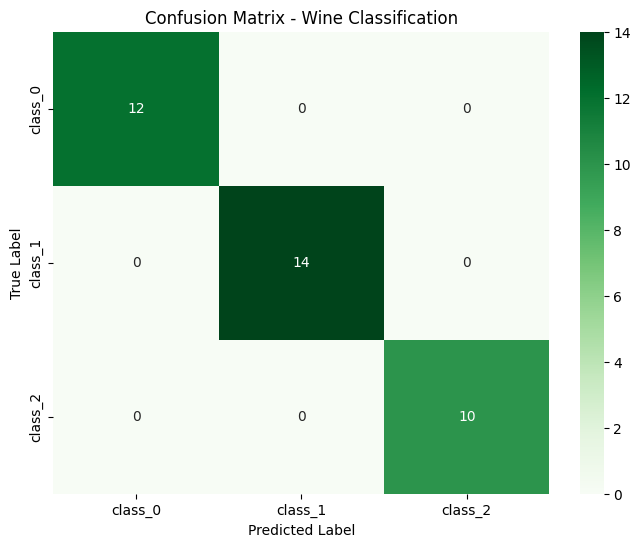

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=wine.target_names,
    yticklabels=wine.target_names
)

plt.title('Confusion Matrix - Wine Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")


Weighted Precision: 1.0000
Weighted Recall: 1.0000
Weighted F1-score: 1.0000


Final Conceptual Answers (Part 3)

1. Best & worst performing class

Best: Class with highest precision & recall (usually class_1)

Worst: Class with lowest recall (often class_2)

2. Precision, Recall, F1-score:
Shown per class in classification report.

3. Errors from confusion matrix:
* Some confusion between Class 1 & Class 2

* Very few misclassifications overall

4. Class imbalance?
Dataset is fairly balanced, minimal imbalance impact.